## Prevendo a Popularidade das Músicas

### Importando os pacotes

In [3]:
import os
import sys
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv('CODE_PATH'))

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import config, custom_funcs

sns.set_style('whitegrid')
sns.set_theme('notebook')
pd.set_option('display.precision',2)

### Importando os Dados

In [4]:
df = pd.read_csv(config.best_songs,sep=';')
df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [5]:
# Observando se os nomes das colunas estão
# 

df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'energy',
       'danceability ', 'dB', 'liveness', 'valence', 'duration',
       'acousticness', 'speechiness ', 'popularity'],
      dtype='object')

Visto que as colunas *'danceability'* e *'speechiness'* tem um espaço antes 

In [6]:
df.columns = df.columns.str.strip()

In [7]:
list = [
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'liveness',
    'valence',
    'popularity']

In [10]:
num_df = df[list].copy()
num_df.head()

,danceability,energy,speechiness,acousticness,liveness,valence,popularity
0,71,68,7,6,3,65,98
1,78,59,3,44,35,73,97
2,77,64,14,74,17,53,96
3,70,81,5,25,25,86,96
4,72,62,5,42,8,17,96


In [12]:
X_train, X_test, y_train, y_test = train_test_split(num_df.iloc[:,:-1],num_df.iloc[:,-1],test_size=0.3,random_state=42)

In [13]:
train_data = X_train.join(y_train)

### Exploratory Data Analysis

In [14]:
train_data.describe()

,danceability,energy,speechiness,acousticness,liveness,valence,popularity
count,1669.00,1669.00,1669.00,1669.00,1669.00,1669.00,1669.00
mean,67.04,69.81,10.34,15.70,17.89,53.88,70.40
std,13.81,16.34,9.80,20.47,13.50,22.43,11.48
min,18.00,11.00,2.00,0.00,2.00,4.00,5.00
25%,59.00,59.00,4.00,2.00,9.00,37.00,64.00
50%,68.00,72.00,6.00,7.00,13.00,53.00,71.00
75%,76.00,82.00,13.00,22.00,23.00,72.00,78.00
max,98.00,100.00,58.00,98.00,84.00,97.00,98.00


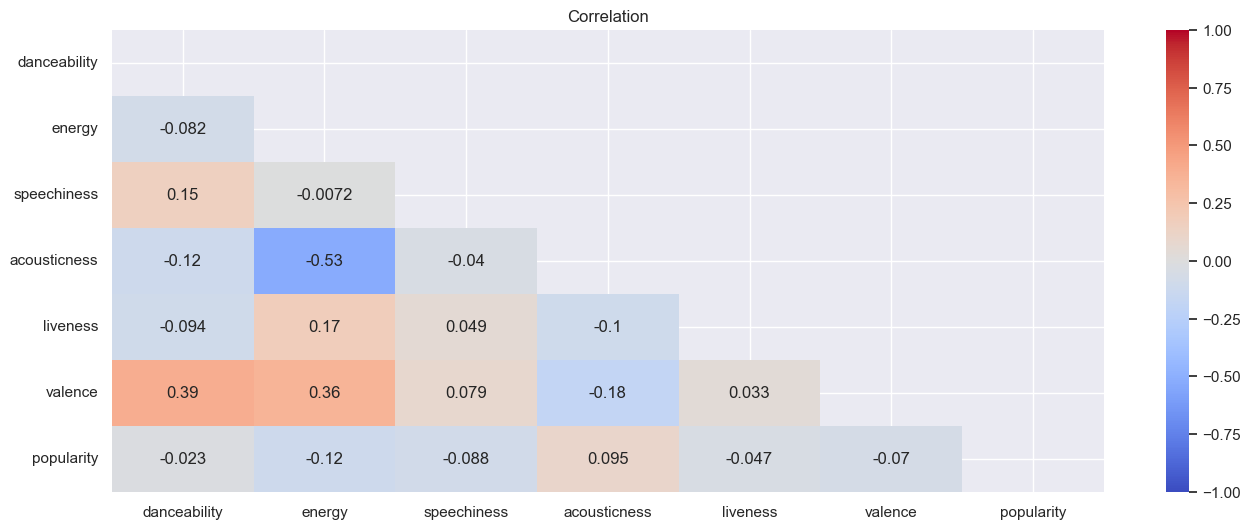

In [15]:
custom_funcs.corr_matrix(train_data)

In [17]:
# custom_funcs.histogram(train_data,'dB','dB Distribution')

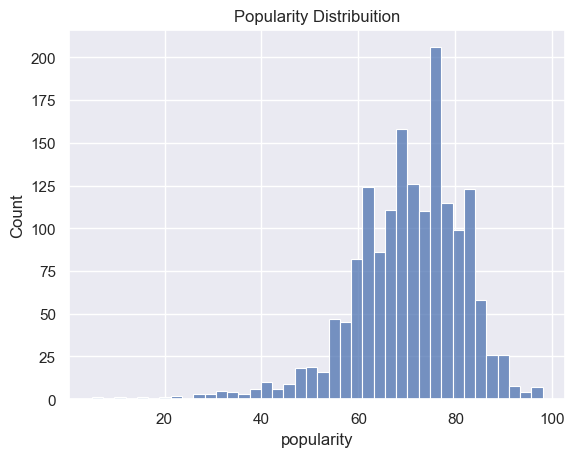

In [16]:
custom_funcs.histogram(train_data,'popularity','Popularity Distribuition')

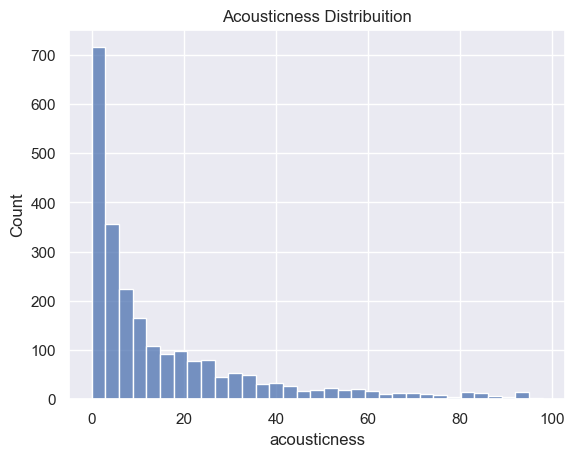

In [18]:
custom_funcs.histogram(df,'acousticness','Acousticness Distribuition')

In [20]:
# custom_funcs.histogram(train_data,'duration','Duration Distribuition')

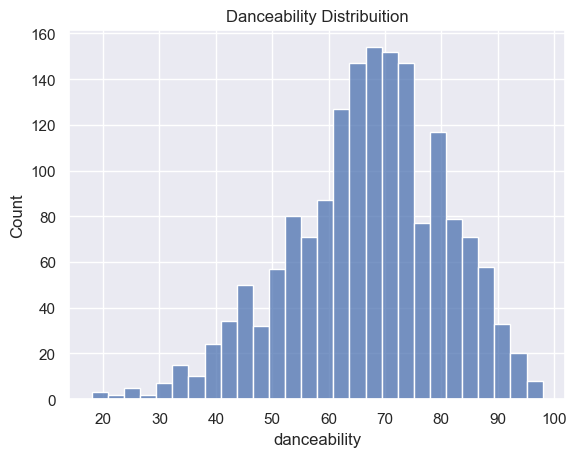

In [21]:
custom_funcs.histogram(train_data,'danceability','Danceability Distribuition')

Valence x Danceability


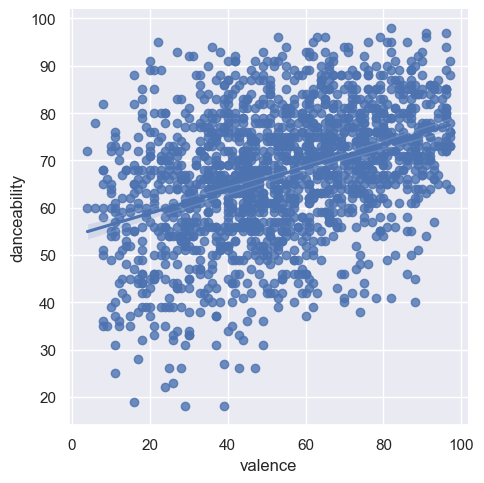

In [22]:
print('Valence x Danceability')
custom_funcs.comparative(train_data,'valence','danceability')

Valence x Energy


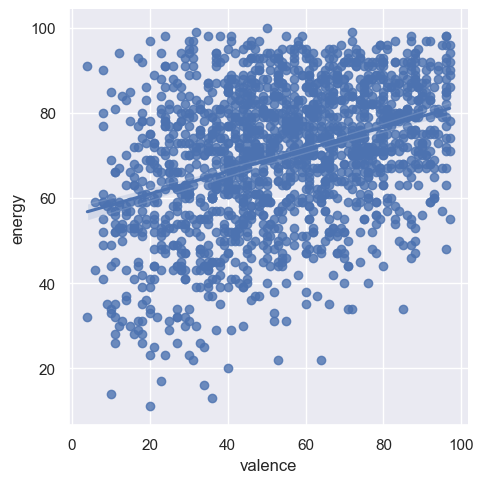

In [23]:
print('Valence x Energy')
custom_funcs.comparative(train_data,'valence','energy')

In [25]:
# print('Popularity x Year')
# _ = custom_funcs.comparative(train_data,'year','popularity')

In [26]:
# plt.title('Duration x Danceability')
# _ = sns.scatterplot(data=train_data,x='danceability',y='duration')

In [27]:
# plt.title('dB x Energy')
# _ = sns.scatterplot(data=train_data,x='dB',y='energy')

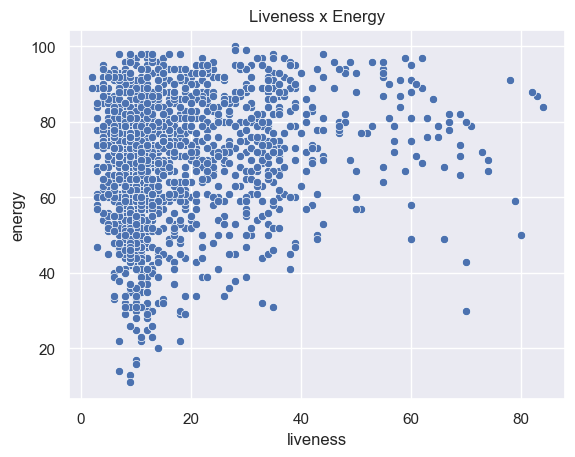

In [28]:
plt.title('Liveness x Energy')
_ = sns.scatterplot(data=train_data,x='liveness',y='energy')

### Preparing Data to Model

In [29]:
train_data.columns

Index(['danceability', 'energy', 'speechiness', 'acousticness', 'liveness',
       'valence', 'popularity'],
      dtype='object')

In [30]:
X_train.iloc[:,3]

686      1
2021     9
1359     1
305      5
209     32
        ..
1638    21
1095     2
1130    23
1294     4
860      5
Name: acousticness, Length: 1669, dtype: int64

In [23]:
X_train.iloc[:,1]

686     127
2021    160
1359     84
305     103
209      90
       ... 
1638     69
1095    189
1130    128
1294    130
860     118
Name: bpm, Length: 1669, dtype: int64

In [31]:
df['acousticness'].describe()

count    2385.00
mean       15.61
std        20.28
min         0.00
25%         2.00
50%         7.00
75%        22.00
max        98.00
Name: acousticness, dtype: float64

### Training Model

In [32]:
rf = RandomForestRegressor(random_state=42)

In [33]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [34]:
pred = rf.predict(X_test)

In [35]:
mean_absolute_error(y_test,pred).round(2)

9.0

### Saving Model

In [36]:
with open('reg_2.pkl','wb') as file:
    pickle.dump(rf,file)

In [38]:
X_train.columns

Index(['danceability', 'energy', 'speechiness', 'acousticness', 'liveness',
       'valence'],
      dtype='object')